In [1]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Retail.xlsx')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
pd.set_option('display.max_rows', 999)
df.head(300)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [7]:
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.head(300)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [9]:
df['StockCode']= df['StockCode'].astype(str)

In [10]:
customers = df["CustomerID"].unique().tolist()
len(customers)

4372

In [11]:
random.shuffle(customers)
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]
train_df = df[df['CustomerID'].isin(customers_train)]
validation_df = df[~df['CustomerID'].isin(customers_train)]

In [12]:
print(customers_train)
print("---------------------")
print(train_df.head())
print("----------------------")
validation_df.head()

[14420.0, 17205.0, 16966.0, 17442.0, 17041.0, 17693.0, 14459.0, 18016.0, 17939.0, 15350.0, 12943.0, 14463.0, 17014.0, 14127.0, 13138.0, 18278.0, 13436.0, 13621.0, 17564.0, 16202.0, 14024.0, 14474.0, 14039.0, 14036.0, 12838.0, 12672.0, 17483.0, 17002.0, 14688.0, 16210.0, 16012.0, 17400.0, 16698.0, 14497.0, 16186.0, 15721.0, 17600.0, 12644.0, 14159.0, 13951.0, 12603.0, 15424.0, 13610.0, 16049.0, 12600.0, 14619.0, 12518.0, 16116.0, 16849.0, 13772.0, 18082.0, 16549.0, 15976.0, 13594.0, 14600.0, 17832.0, 15520.0, 14102.0, 14339.0, 14152.0, 17648.0, 12690.0, 13894.0, 13243.0, 16574.0, 18202.0, 17530.0, 15829.0, 16351.0, 16206.0, 13410.0, 17379.0, 16322.0, 13098.0, 17714.0, 13495.0, 14051.0, 17725.0, 16184.0, 16961.0, 12913.0, 18096.0, 17361.0, 15297.0, 14883.0, 14569.0, 15592.0, 18216.0, 14449.0, 12909.0, 17527.0, 13200.0, 12508.0, 15881.0, 15839.0, 12642.0, 15704.0, 16383.0, 15031.0, 16633.0, 12561.0, 14765.0, 13791.0, 16917.0, 17964.0, 13296.0, 15953.0, 13705.0, 13777.0, 17194.0, 12646.0, 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
105,536380,22961,JAM MAKING SET PRINTED,24,2010-12-01 09:41:00,1.45,17809.0,United Kingdom
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098.0,United Kingdom
143,536382,21912,VINTAGE SNAKES & LADDERS,8,2010-12-01 09:45:00,3.75,16098.0,United Kingdom
144,536382,21832,CHOCOLATE CALCULATOR,12,2010-12-01 09:45:00,1.65,16098.0,United Kingdom
145,536382,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01 09:45:00,1.95,16098.0,United Kingdom


In [13]:
purchases_train = []

for i in tqdm(customers_train):
    temp = train_df[train_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_train.append(temp)

100%|██████████| 3935/3935 [00:03<00:00, 1156.22it/s]


In [14]:
purchases_val = []

for i in tqdm(validation_df['CustomerID'].unique()):
    temp = validation_df[validation_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_val.append(temp)

100%|██████████| 437/437 [00:00<00:00, 1452.99it/s]


In [15]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(3572037, 3610700)

In [16]:
model.save("word2vec.model")

In [17]:
model.init_sims(replace=True)

In [18]:
print(model)

Word2Vec(vocab=3149, size=100, alpha=0.03)


In [19]:
X = model[model.wv.vocab]

X.shape

(3149, 100)

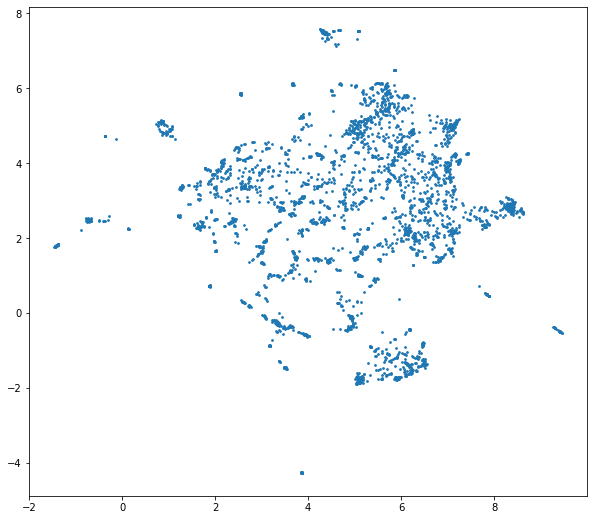

In [20]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [21]:
products = train_df[["StockCode", "Description"]]
products.drop_duplicates(inplace=True, subset='StockCode', keep="last")
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [22]:
products_dict['71270']

['PHOTO CLIP LINE']

In [23]:
def similar_products(v, n = 6):
    
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms

In [25]:
similar_products(model['71270'])

[('ASSORTED COLOUR LIZARD SUCTION HOOK', 0.5585223436355591),
 ('FIRST CLASS PASSPORT COVER ', 0.4985191226005554),
 ('BASKET OF TOADSTOOLS', 0.4916921555995941),
 ('MINI LADLE LOVE HEART PINK', 0.49155092239379883),
 ('THREE CANVAS LUGGAGE TAGS', 0.4869576394557953),
 ('ASSTD COL BUTTERFLY/CRYSTAL W/CHIME', 0.4845554530620575)]

In [26]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

In [27]:
len(purchases_val[0])

64

In [28]:
aggregate_vectors(purchases_val[0]).shape

(100,)

In [29]:
similar_products(aggregate_vectors(purchases_val[0]))

[('PAPER CHAIN KIT VINTAGE CHRISTMAS', 0.6619182229042053),
 ('SET OF 20 VINTAGE CHRISTMAS NAPKINS', 0.653589129447937),
 ('WORLD WAR 2 GLIDERS ASSTD DESIGNS', 0.6420211791992188),
 ('CHRISTMAS CRAFT WHITE FAIRY ', 0.6355312466621399),
 ('CHRISTMAS CRAFT LITTLE FRIENDS', 0.6243491768836975),
 ('FELTCRAFT CUSHION OWL', 0.6204315423965454)]

In [30]:
similar_products(aggregate_vectors(purchases_val[0][-10:]))

[('GARDENERS KNEELING PAD KEEP CALM ', 0.7255051732063293),
 ('ROTATING SILVER ANGELS T-LIGHT HLDR', 0.667850136756897),
 ('CHRISTMAS CRAFT WHITE FAIRY ', 0.6534646153450012),
 ('CHRISTMAS CRAFT TREE TOP ANGEL', 0.6444936990737915),
 ("PAPER CHAIN KIT 50'S CHRISTMAS ", 0.6425951719284058),
 ('VINTAGE  2 METRE FOLDING RULER', 0.6336163282394409)]